In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

In [35]:
X_train.head()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,0.0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,...,NaN,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272
1,1.0,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,...,NaN,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764
2,2.0,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,...,10329.704431,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728
3,3.0,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,...,10008.251395,6212.127347,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN
4,4.0,13801.016418,13269.493652,3408.316953,92048.527786,103.759758,95.789235,9667.353978,10750.783106,10618.800750,...,10095.782015,13772.061493,NaN,NaN,100.369834,2693.053231,2.702908,1471.354073,1071.284484,9423.533063


In [36]:
for i in range(len(y_train)):
    assert y_train.iloc[i, :]["id"] == y_train.index.get_loc(i)

In [37]:
X_train=X_train.drop("id", axis=1)
y_train=y_train.drop("id", axis=1)
X_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,10.227734,...,NaN,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272
1,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,11.436970,...,NaN,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764
2,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,10.810076,...,10329.704431,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728
3,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,10.092109,...,10008.251395,6212.127347,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN
4,13801.016418,13269.493652,3408.316953,92048.527786,103.759758,95.789235,9667.353978,10750.783106,10618.800750,12.006773,...,10095.782015,13772.061493,NaN,NaN,100.369834,2693.053231,2.702908,1471.354073,1071.284484,9423.533063


# Imputation

### Median and Mean of Different Features

In [38]:
from sklearn.impute import KNNImputer

In [39]:
X_train_copy = X_train.copy()

In [40]:
indices = [1, 300, 620]

In [41]:
columns = X_train.iloc[:, indices]

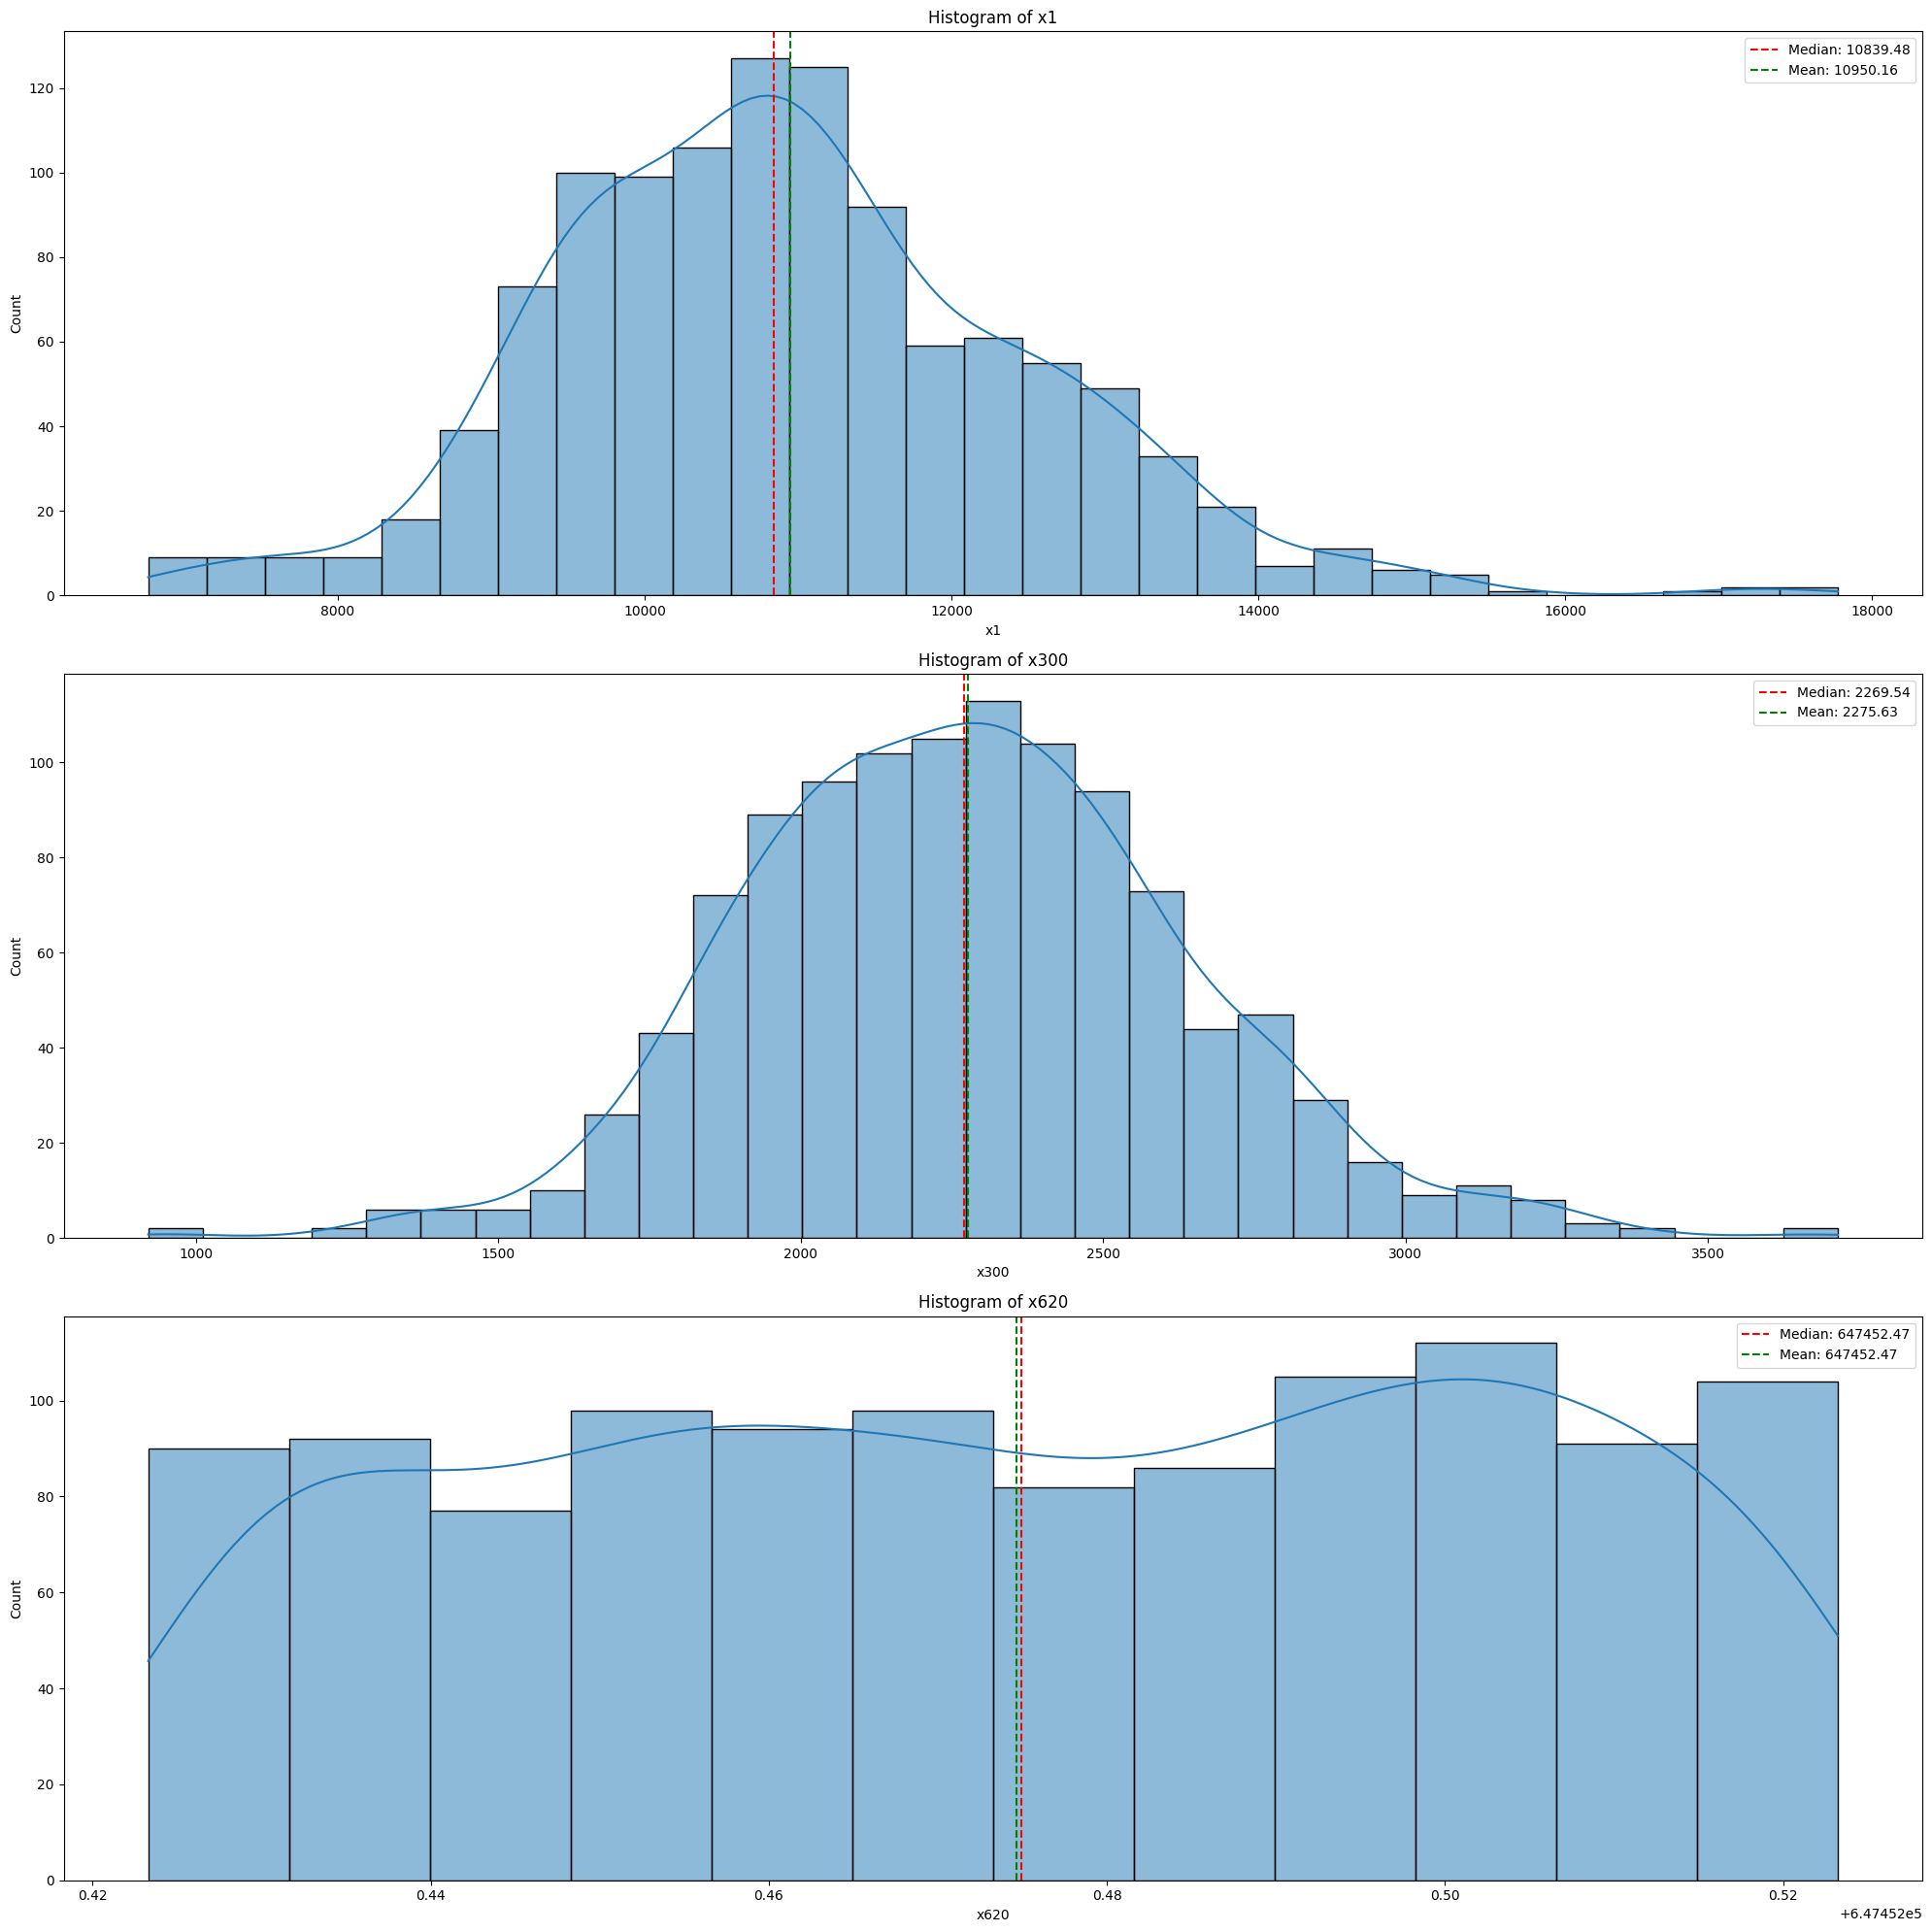

In [42]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    sns.histplot(columns[col], kde=True)

    median = np.nanmedian(columns[col])
    plt.axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')

    mean = np.nanmean(columns[col])
    plt.axvline(mean, color='green', linestyle='--', label=f'Mean: {mean:.2f}')

    plt.title(f'Histogram of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

In [43]:
X_train = X_train.fillna(X_train.median())

# Scaling & Outlier

### Min-Max-Scaler

In [44]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
X_scaled_different = []
X_scaled_different.append(min_max_scaler.fit_transform(X_train))
X_scaled_different.append(robust_scaler.fit_transform(X_train))
X_scaled_different.append(standard_scaler.fit_transform(X_train))

### Outlier Detection

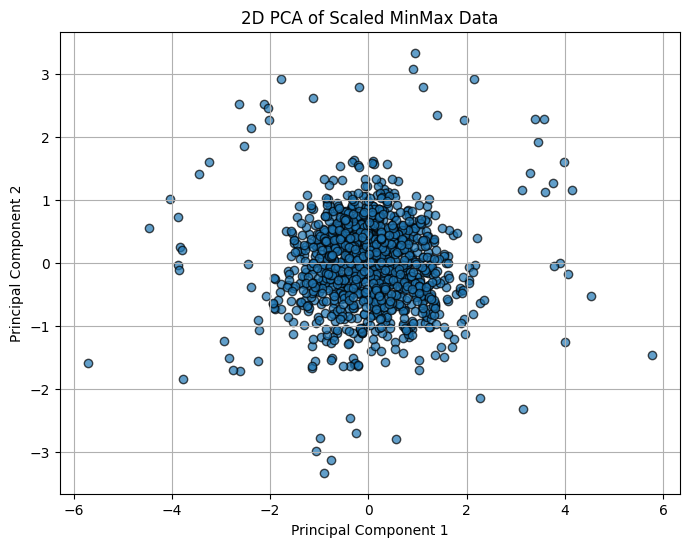

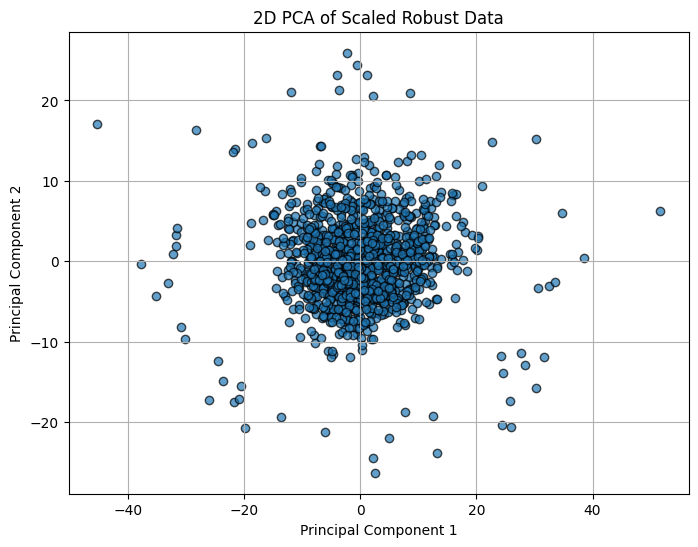

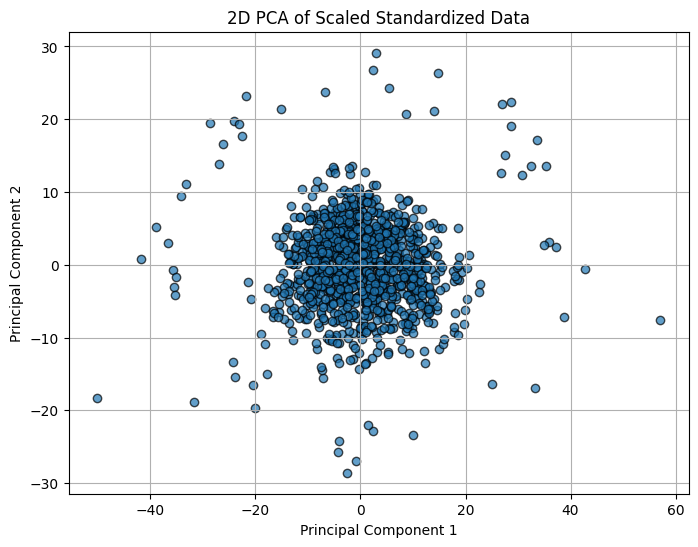

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca_diff = []
for i, data in enumerate(X_scaled_different):
    # Assuming `X_scaled` is already scaled
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)
    X_pca_diff.append(X_pca)

    # Plotting the 2D PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    if i == 0:
        plt.title("2D PCA of Scaled MinMax Data")
    if i == 1:
        plt.title("2D PCA of Scaled Robust Data")
    if i == 2:
        plt.title("2D PCA of Scaled Standardized Data")
    plt.grid(True)
    plt.show()


We take Robust

In [46]:
X_scaled = X_scaled_different[1]
X_pca = X_pca_diff[1]

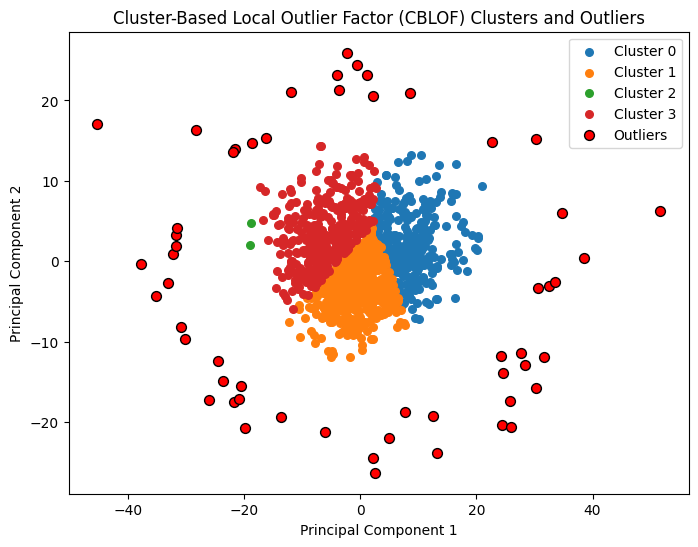

In [47]:
from pyod.models.cblof import CBLOF
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans

# Assuming X_pca is your dataset after PCA transformation

# Apply CBLOF for clustering and outlier detection
cblof = CBLOF(n_clusters=4, contamination=0.045, clustering_estimator=KMeans(n_clusters=4, random_state=43), random_state=42)
cblof.fit(X_pca)
cluster_labels = cblof.cluster_labels_  # Cluster labels assigned by CBLOF
outlier_labels = cblof.labels_  # Outlier labels, where 1 = outlier and 0 = inlier

# Plot the clusters and outliers
plt.figure(figsize=(8, 6))

# Plot each cluster with a unique color
for cluster in np.unique(cluster_labels):
    # Mask for points in the current cluster
    in_cluster = (cluster_labels == cluster) & (outlier_labels == 0)
    plt.scatter(X_pca[in_cluster, 0], X_pca[in_cluster, 1], s=30, label=f"Cluster {cluster}")

# Plot the outliers in red
plt.scatter(X_pca[outlier_labels == 1, 0], X_pca[outlier_labels == 1, 1], c='r', edgecolor='k', s=50, label="Outliers")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster-Based Local Outlier Factor (CBLOF) Clusters and Outliers")
plt.legend()
plt.show()


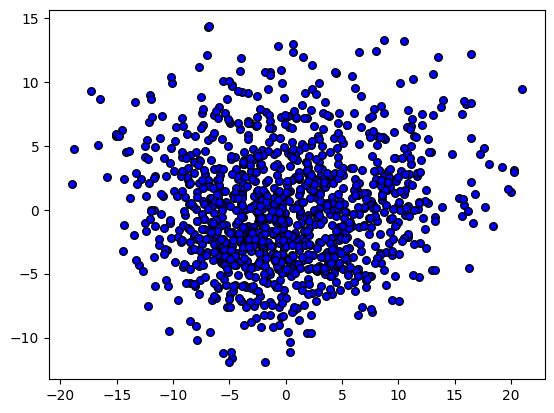

In [48]:
plt.scatter(X_pca[outlier_labels == 0, 0], X_pca[outlier_labels == 0, 1], c='b', edgecolor='k', s=30, label="Inliers")

Evtl. nochmal filtern mit Gauss Outlier

Check if Outliers are actually outliers

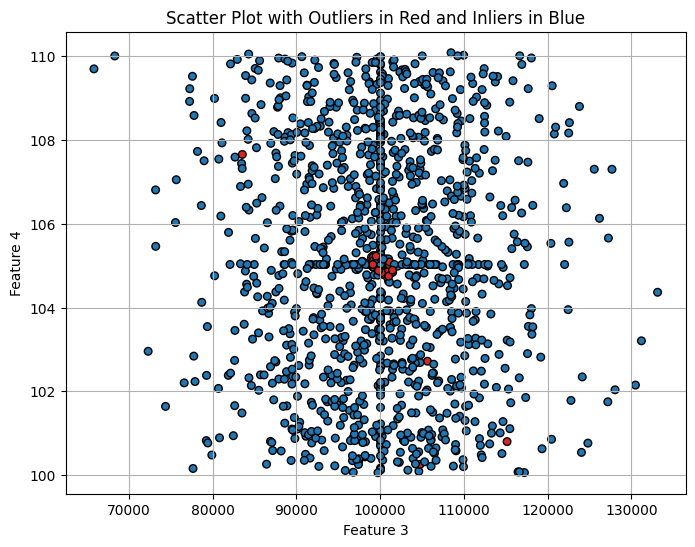

In [49]:
colors = {0: 'tab:blue', 1: 'tab:red'}
color_mapping = np.array([colors[label] for label in outlier_labels])

plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 3], X_train.iloc[:, 4], c=color_mapping, edgecolor='k', s=30)

plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.title("Scatter Plot with Outliers in Red and Inliers in Blue")
plt.grid(True)
plt.show()


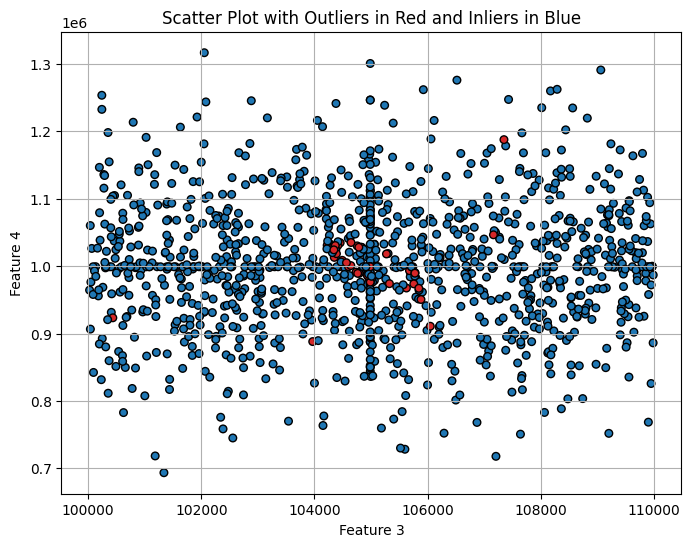

In [50]:
colors = {0: 'tab:blue', 1: 'tab:red'}
color_mapping = np.array([colors[label] for label in outlier_labels])

plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 80], X_train.iloc[:, 290], c=color_mapping, edgecolor='k', s=30)

plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.title("Scatter Plot with Outliers in Red and Inliers in Blue")
plt.grid(True)
plt.show()


Makes Sense

### Re-Scaling

Rescale original data because Gaussian Distributed and Robust Scaler is not as good for gaussian data.

In [51]:
from sklearn.preprocessing import StandardScaler
standard_scaler_post = StandardScaler()
X_scaled = standard_scaler_post.fit_transform(X_train[outlier_labels == 0])
y_train = y_train[outlier_labels == 0]

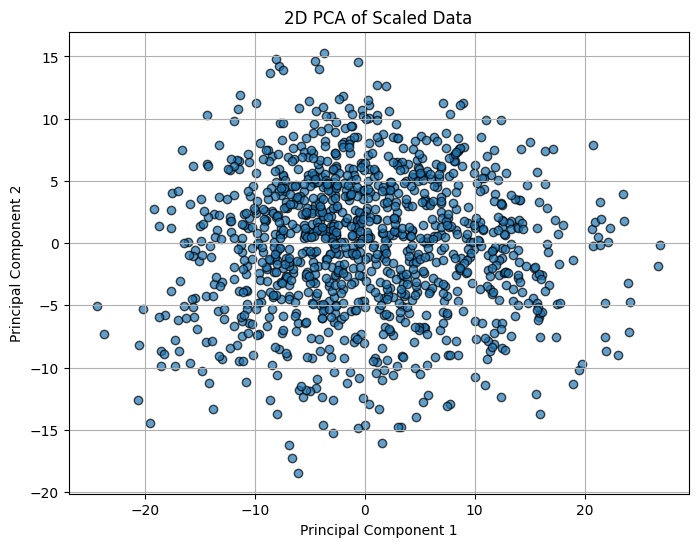

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming `X_scaled` is already scaled
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the 2D PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Scaled Data")
plt.grid(True)
plt.show()

In [53]:
from sklearn.preprocessing import Normalizer
X_scaled_norm = Normalizer().fit_transform(X_train[outlier_labels == 0])

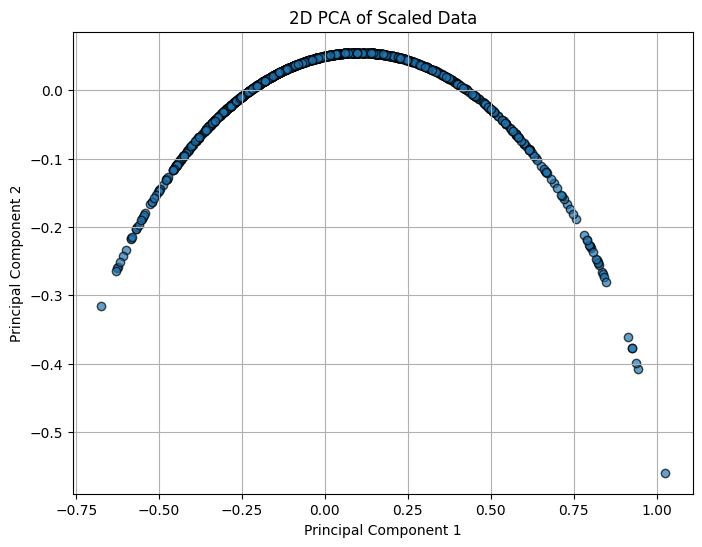

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming `X_scaled` is already scaled
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_norm)

# Plotting the 2D PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Scaled Data")
plt.grid(True)
plt.show()


# Feature Selection

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [104 129 489 530] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


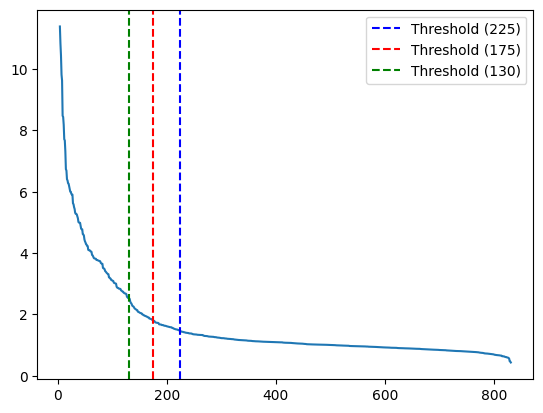

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Fit SelectKBest to get feature scores
selector = SelectKBest(score_func=f_classif, k='all')  # Use 'all' to get scores for all features
X_selected = selector.fit_transform(X_scaled, y_train)

# Get feature scores
scores = selector.scores_

# Sort features by score
sorted_indices = np.argsort(scores)[::-1]  # Get indices sorted by F-value in descending order
sorted_scores = scores[sorted_indices]  # Sorted F-values
original_indices = sorted_indices + 1  # To make it 1-based for better readability

plt.plot(sorted_scores)
plt.axvline(x=225, color='blue', linestyle='--', label='Threshold (225)')
plt.axvline(x=175, color='red', linestyle='--', label='Threshold (175)')
plt.axvline(x=130, color='green', linestyle='--', label='Threshold (130)')
plt.legend()


In [56]:
selector = SelectKBest(score_func=f_classif, k=225)  # Use 'all' to get scores for all features
X_selected = selector.fit_transform(X_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [104 129 489 530] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [57]:
X_selected.shape

(1157, 225)

TODO: Impuding after outlierdetection
Remove redundant features

# Training (CPU)

In [60]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, WhiteKernel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

# Assuming X_selected and y_train are already defined
# Split the data into 90% training and 10% testing
X_train, X_test, y_train_, y_test_ = train_test_split(X_selected, y_train, test_size=0.1, random_state=42)

# Define GPR models
gpr_matern = GaussianProcessRegressor(kernel=Matern(length_scale=1.0, nu=1.5), random_state=42)
gpr_rbf_white = GaussianProcessRegressor(kernel=RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0), random_state=42)

# Create base models, including LightGBM and KNN
base_models = [
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', random_state=42)),
    ('GPR Matern', gpr_matern),
    ('GPR RBF + White', gpr_rbf_white),
    ('LightGBM', lgb.LGBMRegressor(random_state=42)),  # LightGBM model
    ('KNN', KNeighborsRegressor(n_neighbors=1)),  # KNN model
]

# Create stacking regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

# Fit the stacking model on the training data
stacked_model.fit(X_train, y_train_.to_numpy().reshape(-1))

# Make predictions on the test set
y_pred = stacked_model.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_test_, y_pred)
print("R² score on the test set:", r2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57240
[LightGBM] [Info] Number of data points in the train set: 1041, number of used features: 225
[LightGBM] [Info] Start training from score 70.137368


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57214
[LightGBM] [Info] Number of data points in the train set: 832, number of used features: 225
[LightGBM] [Info] Start training from score 70.272837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57220
[LightGBM]

# Training (GPU)

In [59]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, WhiteKernel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

import os

# Check if a GPU is available
if not 'COLAB_GPU' in os.environ:
  raise Exception('No GPU available')

# Assuming X_selected and y_train are already defined
# Split the data into 90% training and 10% testing
X_train, X_test, y_train_, y_test_ = train_test_split(X_selected, y_train, test_size=0.1, random_state=42)

# Define GPR models
gpr_matern = GaussianProcessRegressor(kernel=Matern(length_scale=1.0, nu=1.5), random_state=42)
gpr_rbf_white = GaussianProcessRegressor(kernel=RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0), random_state=42)

# Create base models, including LightGBM and KNN
base_models = [
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', random_state=42,
                                 tree_method="hist", device="cuda")),  # Enable GPU for XGBoost
    ('GPR Matern', gpr_matern),  # Not GPU-compatible
    ('GPR RBF + White', gpr_rbf_white),  # Not GPU-compatible
    ('LightGBM', lgb.LGBMRegressor(random_state=42, device='cuda')),  # Enable GPU for LightGBM
    ('KNN', KNeighborsRegressor(n_neighbors=1)),  # Not GPU-compatible
]

# Create stacking regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

# Fit the stacking model on the training data
stacked_model.fit(X_train, y_train_.to_numpy().reshape(-1))

# Make predictions on the test set
y_pred = stacked_model.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_test_, y_pred)
print("R² score on the test set:", r2)


[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Total Bins 57240
[LightGBM] [Info] Number of data points in the train set: 1041, number of used features: 225
[LightGBM] [Info] Start training from score 70.137368


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:57:59] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Total Bins 57214
[LightGBM] [Info] Number of data points in the train set: 832, number of used features: 225
[LightGBM] [Info] Start training from score 70.272837
[LightGBM] [Warning] No further splits with positive gain, training stopped with 30 leaves.
[LightGBM] [Warning] No further splits with positive gain, training stopped with 30 leaves.
[LightGBM] [Warning] No further splits with positive gain, training stopped with 30 leaves.
[LightGBM] [Warning] No further splits with positive gain, training stopped with 30 leaves.
[LightGBM] [Warning] No further splits with positive gain, training stopped with 30 leaves.
[LightGBM] [Warning] No further splits with positive gain, training stopped with 30 leaves.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Total Bins 57220
[LightGBM] [Info] Number of data points in the train set: 833, number 

In [ ]:
X_test = pd.read_csv("X_test.csv")

In [ ]:
X_test = X_test.fillna(X_test.median())

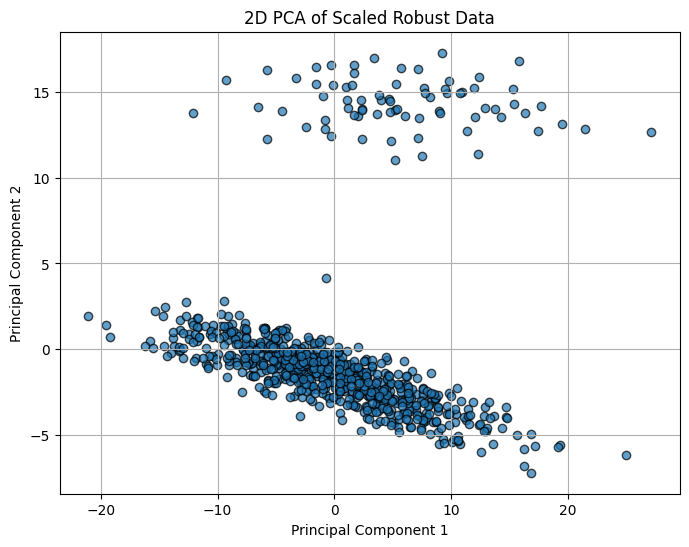

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(RobustScaler().fit_transform(X_test))

# Plotting the 2D PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Scaled Robust Data")
plt.grid(True)
plt.show()

In [ ]:
X_scaled = robust_scaler.fit_transform(X_test.drop(columns=['id']))
X_scaled = standard_scaler_post.fit_transform(X_scaled)

In [ ]:
X_new_selected = selector.transform(X_scaled)
predictions = stacked_model.predict(X_new_selected)

# Create a submission file
submission = pd.DataFrame({'id': X_test['id'], 'y': predictions})
submission.to_csv('submission.csv', index=False)

## GridSearchCV (CPU)

In [ ]:
from sklearn.model_selection import GridSearchCV

gpr_matern = GaussianProcessRegressor(kernel=Matern(length_scale=1.0, nu=1.5), random_state=42)
gpr_rbf_white = GaussianProcessRegressor(kernel=RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0), random_state=42)

# Create base models, including LightGBM and KNN
base_models = [
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', random_state=42)),
    ('GPR Matern', gpr_matern),
    ('GPR RBF + White', gpr_rbf_white),
    ('LightGBM', lgb.LGBMRegressor(random_state=42)),  # LightGBM model
    ('KNN', KNeighborsRegressor(n_neighbors=1)),  # KNN model
]

# Create stacking regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)


param_grid = {
    'XGBoost__n_estimators': [50, 100],
    'XGBoost__learning_rate': [0.1, 0.3],
    'XGBoost__max_depth': [3, 7],
    'LightGBM__n_estimators': [50, 100],
    'LightGBM__learning_rate': [0.05, 0.1],
    'GPR Matern__alpha': [1e-10, 1e-2],
    'GPR RBF + White__alpha': [1e-10, 1e-2]
}


# Wrap stacking regressor in GridSearchCV
grid_search = GridSearchCV(
    estimator=stacked_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='r2',
    n_jobs=1,
    verbose=4
)

# Fit GridSearchCV
grid_search.fit(X_selected, y_train.to_numpy().reshape(-1))

# Get the best parameters and R² score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)


Fitting 3 folds for each of 128 candidates, totalling 384 fits


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 1/3] END GPR Matern__alpha=1e-10, GPR RBF + White__alpha=1e-10, LightGBM__learning_rate=0.05, LightGBM__n_estimators=50, XGBoost__learning_rate=0.1, XGBoost__max_depth=3, XGBoost__n_estimators=50;, score=0.619 total time=  33.2s
[CV 2/3] END GPR Matern__alpha=1e-10, GPR RBF + White__alpha=1e-10, LightGBM__learning_rate=0.05, LightGBM__n_estimators=50, XGBoost__learning_rate=0.1, XGBoost__max_depth=3, XGBoost__n_estimators=50;, score=0.690 total time=  26.7s
[CV 3/3] END GPR Matern__alpha=1e-10, GPR RBF + White__alpha=1e-10, LightGBM__learning_rate=0.05, LightGBM__n_estimators=50, XGBoost__learning_rate=0.1, XGBoost__max_depth=3, XGBoost__n_estimators=50;, score=0.686 total time=  28.2s


KeyboardInterrupt: 

In [ ]:
# prompt: do the upper cell but optimised for gpu

from sklearn.model_selection import GridSearchCV

# Check if a GPU is available
if not 'COLAB_GPU' in os.environ:
  raise Exception('No GPU available')

gpr_matern = GaussianProcessRegressor(kernel=Matern(length_scale=1.0, nu=1.5), random_state=42)
gpr_rbf_white = GaussianProcessRegressor(kernel=RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0), random_state=42)

base_models = [
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', random_state=42,
                                 tree_method="hist", device="cuda")),  # Enable GPU for XGBoost
    ('GPR Matern', gpr_matern),  # Not GPU-compatible
    ('GPR RBF + White', gpr_rbf_white),  # Not GPU-compatible
    ('LightGBM', lgb.LGBMRegressor(random_state=42, device='cuda')),  # Enable GPU for LightGBM
    #('KNN', KNeighborsRegressor(n_neighbors=1)),  # Not GPU-compatible
]

# Create stacking regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)


param_grid = {
    'XGBoost__n_estimators': [50, 100],
    'XGBoost__learning_rate': [0.1, 0.3],
    'XGBoost__max_depth': [3, 7],
    'LightGBM__n_estimators': [50, 100],
    'LightGBM__learning_rate': [0.05, 0.1],
    'GPR Matern__alpha': [1e-10, 1e-2],
    'GPR RBF + White__alpha': [1e-10, 1e-2]
}


# Wrap stacking regressor in GridSearchCV
grid_search = GridSearchCV(
    estimator=stacked_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=4
)

# Fit GridSearchCV
grid_search.fit(X_selected, y_train.to_numpy().reshape(-1))

# Get the best parameters and R² score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)



Fitting 3 folds for each of 128 candidates, totalling 384 fits


## Grid Search (CUDA)

# Evaluation